DZ_8_Корреляционный анализ

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

###1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
###Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy Полученные значения должны быть равны.
###Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

In [ ]:
x_zp =  np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y_ks =  np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
#Найдем нужные данные для использования их в формуле: cov = [XY]avg - [X]avg * [Y]avg
x_zp_avg = sum(x_zp) /len(x_zp) # расчет среднего массива
y_ks_avg = y_ks.mean() # через функцию mean
xy_avg = (x_zp * y_ks).mean() #среднее значение суммированных значений массивов


cov_xy = xy_avg - x_zp_avg * y_ks_avg
# Коэффициент корреляции Пирсона расчитаем по формуле: corr_P(xy) = cov_xy / (std_X * std_Y)
# Рассчитаем среднеквадратичные отклонения массивов
std_x_zp, std_y_ks = x_zp.std (), y_ks.std () #так как выборки = ген совокупности, не используем смещение (степени свободы ddof = 1)
corr_P_xy = cov_xy / (std_x_zp * std_y_ks)
diff = np.mean(zp - ks)
print (f'Коэффициент корреляции Пирсона = {round(corr_P_xy, 4)} при ковирации = {round(cov_xy, 4)}')
print (f'Средн. зарплатное значение = {x_zp_avg}, средн. скоринговое значение  =  {y_ks_avg}')

Коэффициент корреляции Пирсона = 0.8875 при ковирации = 9157.84
Средн. зарплатное значение = 101.4, средн. скоринговое значение  =  709.9


Коэффициент корреляции Пирсона из базы данных = [[1.         0.88749009]
 [0.88749009 1.        ]] 
 при ковирации = [[ 3494.64  9157.84]
 [ 9157.84 30468.89]]


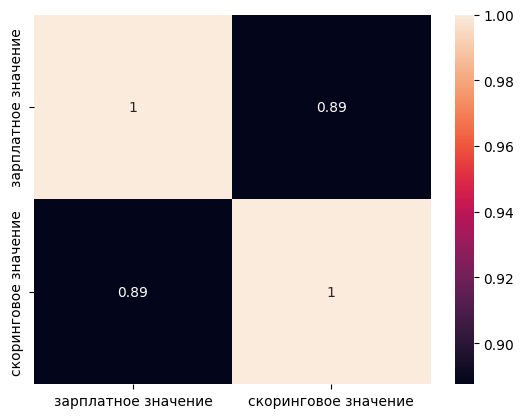

In [90]:
print (f'Коэффициент корреляции Пирсона из базы данных = {np.corrcoef(x_zp, y_ks, dtype=np.float64)} \n при ковирации = {np.cov(x_zp, y_ks, ddof=0)}')
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(data = {'зарплатное значение': x_zp, 'скоринговое значение': y_ks})
# taking all rows but only
df_small = df.iloc[:,:6] #rows - / columns 6
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

###2. Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:
[131, 125, 115, 122, 131, 115, 107, 99, 125, 111].
###Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [ ]:
x_data = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
X̅ = x_data.mean() # X̅ Среднее выборочное
α, β = 0.05, 1 - α
n = len(x_data) # длина массива len(x_data) = n выборки
df = n - 1  # это не генеральная совокупность, а выборка, поэтому степень свободы = n выборки -1
std = x_data.std (ddof = 1) # std среднее квадратическое отклонение
t_critich = stats.t.ppf(α, df)   # в случае, когда std неизвестно, выборка менее 30, используется t-распределение
res1 = X̅ - t_critich * std / np.sqrt(n) #найдем 2 значения т.к.это интервал слева и справа от X̅
res2 = X̅ + t_critich * std / np.sqrt(n)
print (f'Ответ: Доверительный интервал для математического ожидания IQ студентов с надежностью: {β} =  [{round(res2, 4)} ; {round(res1, 4)}]')
print (f'критерий t табличный = {t_critich}')

Ответ: Доверительный интервал для математического ожидания IQ студентов с надежностью: 0.95 =  [111.9869 ; 124.2131]
критерий t табличный = -1.8331129326536337


###3. Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

Запись данных: X̅ = 174.2; α = (1-0.95)/2 = 0.025 так как тест двухсторонний; n = 27; D = 25 кв.см

In [ ]:
X̅, n, D = 174.2, 27 , 25
std = D **(1/2)
α, β = (1-β)/2 , 0.95  # =0.025 так как тест двухсторонний
#n = len(x_data) # длина массива len(x_data) = n выборки
df = n - 1  # это не генеральная совокупность, а выборка, поэтому степень свободы = n выборки -1
#std = x_data.std (ddof = 1) # std среднее квадратическое отклонение
t_critich = stats.t.ppf(α, df)   # в случае, когда std неизвестно, выборка менее 30, используется t-распределение

res1 = X̅ - t_critich * std / np.sqrt(n) #найдем 2 значения т.к.это интервал слева и справа от X̅
res2 = X̅ + t_critich * std / np.sqrt(n)

print (f'Ответ: Доверительный интервал для математического ожидания роста футболистов с надежностью: {β} =  [{round(res2, 4)} ; {round(res1, 4)}]')
print (f'критерий t табличный = {t_critich}')

Ответ: Доверительный интервал для математического ожидания роста футболистов с надежностью: 0.95 =  [172.2221 ; 176.1779]
критерий t табличный = -2.055529438642871
